<a href="https://colab.research.google.com/github/G-Conard/ds595-final-project/blob/main/LSTM_Heat_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
132/132 [==============================] - 51s 352ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 2/20
132/132 [==============================] - 43s 329ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 3/20
132/132 [==============================] - 43s 329ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 4/20
132/132 [==============================] - 45s 338ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 5/20
132/132 [==============================] - 46s 345ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 6/20
132/132 [==============================] - 44s 334ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7/20
132/132 [==============================] - 43s 324ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 8/20
132/132 [==============================] - 4

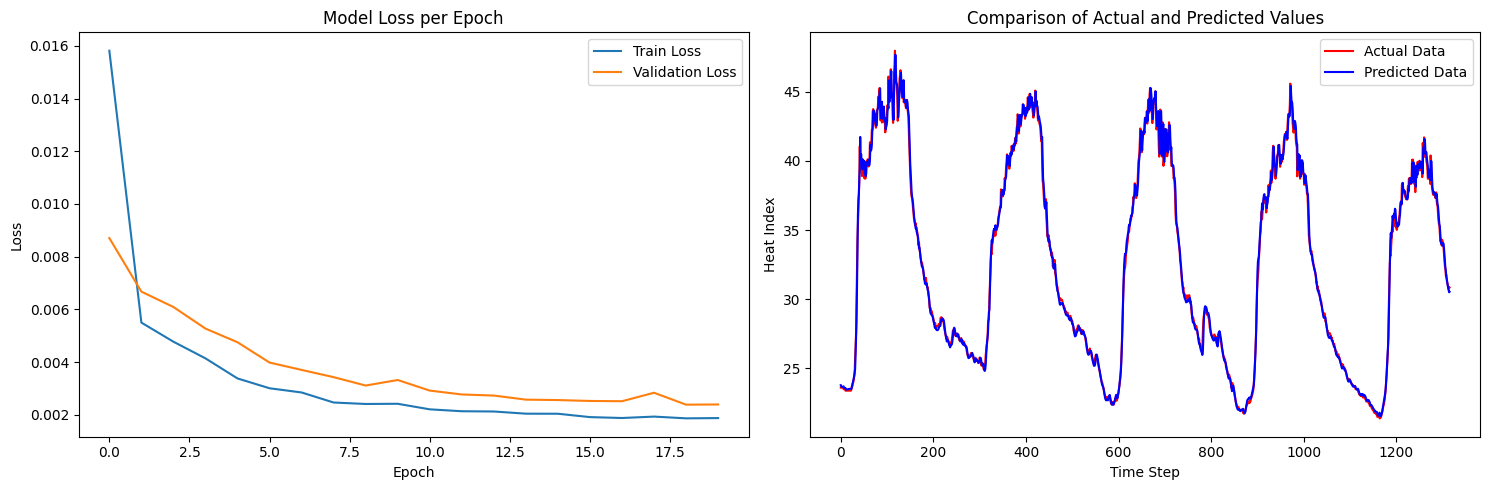

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load and prepare data
data = pd.read_csv('https://raw.githubusercontent.com/G-Conard/ds595-final-project/main/weather_stations_data.csv')
data = data.dropna()
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data = data[['heat_index']].values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
sc = scaler.fit_transform(data)

# Define timestep for the model
timestep = 288
X, Y = [], []
for i in range(len(sc) - timestep):
    X.append(sc[i:(i + timestep)])
    Y.append(sc[i + timestep])
X, Y = np.array(X), np.array(Y)
X = X[:, :, None]  # Reshape for LSTM [samples, time steps, features]

# Split the data into training and test sets
split_idx = int(0.8 * len(X))
X_train, Y_train = X[:split_idx], Y[:split_idx]
X_test, Y_test = X[split_idx:], Y[split_idx:]

# Build the model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(timestep, 1), return_sequences=True),
    Dropout(0.1),
    LSTM(64, activation='tanh', return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(X_test, Y_test, verbose=1)

# Print the results
print("Test Loss:", test_loss)
print("Test MSE:", test_mse)

# Plot the training and validation loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Predict using the model
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Inverse transform to original scale
Y_test_rescaled = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Also inverse transform actual data

# Plotting the results of predictions
plt.subplot(1, 2, 2)
plt.plot(Y_test_rescaled, label='Actual Data', color='red')
plt.plot(predicted, label='Predicted Data', color='blue')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Heat Index')
plt.legend()

plt.tight_layout()
plt.show()


289/289 [==============================] - 25s 88ms/step


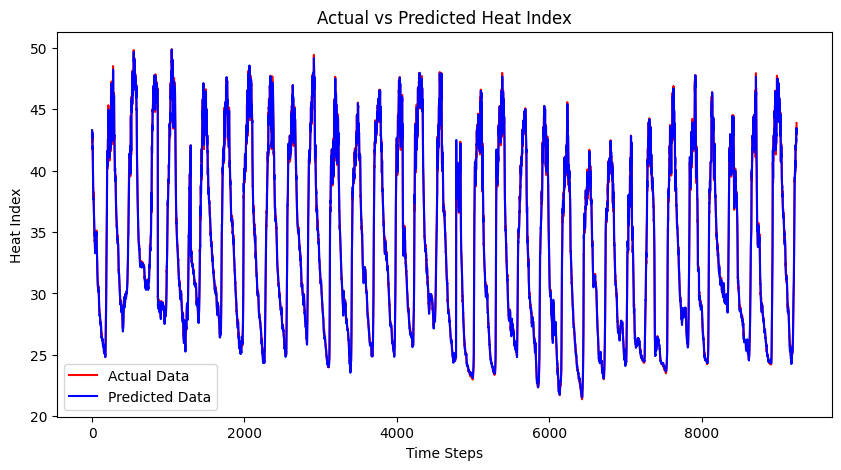

289/289 [==============================] - 30s 104ms/step - loss: 0.0015 - mse: 0.0015
New test Loss: 0.0015173001447692513
New test MSE: 0.0015173001447692513


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanSquaredError

# Load and prepare data (example data loading)
data = pd.read_csv('https://raw.githubusercontent.com/G-Conard/ds595-final-project/main/weather_stations_data%20NEW.csv')
data = data.dropna()
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data = data[['heat_index']].values.astype('float32')

# Assume scaler and model are already defined and trained
# Preprocess the new dataset similarly to how the training data was processed
new_data_scaled = scaler.transform(data)

# Assuming 'timestep' is defined as in your model training
X_new = []
Y_new = []
for i in range(len(new_data_scaled) - timestep):
    X_new.append(new_data_scaled[i:(i + timestep)])
    Y_new.append(new_data_scaled[i + timestep])
X_new = np.array(X_new)
Y_new = np.array(Y_new)
X_new = X_new[:, :, None]  # Reshape for LSTM if needed

# Predict using the model
predictions = model.predict(X_new)
predictions_rescaled = scaler.inverse_transform(predictions)  # Rescale if necessary

# Plotting actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(Y_new.reshape(-1, 1)), label='Actual Data', color='red')  # Y_new contains the actual targets
plt.plot(predictions_rescaled, label='Predicted Data', color='blue')
plt.title('Actual vs Predicted Heat Index')
plt.xlabel('Time Steps')
plt.ylabel('Heat Index')
plt.legend()
plt.show()

New_test_loss, New_test_mse = model.evaluate(X_new, Y_new, verbose=1)


print("New test Loss:", New_test_loss)
print("New test MSE:", New_test_mse)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(Y_new.reshape(-1, 1)), predictions_rescaled))

# Calculate MAE
mae = mean_absolute_error(scaler.inverse_transform(Y_new.reshape(-1, 1)), predictions_rescaled)

# Calculate R^2 Score
r2 = r2_score(scaler.inverse_transform(Y_new.reshape(-1, 1)), predictions_rescaled)

# Print the results
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)




Root Mean Squared Error (RMSE): 0.5550735
Mean Absolute Error (MAE): 0.3299777
R^2 Score: 0.9940559810075055


In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate predictions
predicted = model.predict(X_test)
predicted_rescaled = scaler.inverse_transform(predicted)

# Rescale the actual test data
Y_test_rescaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate R2, RMSE, and MAE
r2 = r2_score(Y_test_rescaled, predicted_rescaled)
rmse = mean_squared_error(Y_test_rescaled, predicted_rescaled, squared=False)  # squared=False returns RMSE
mae = mean_absolute_error(Y_test_rescaled, predicted_rescaled)

# Print the evaluation metrics
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

42/42 [==============================] - 5s 108ms/step
R2 Score: 0.9954689311332235
RMSE: 0.4941098
MAE: 0.32604522
